In [1]:
import pandas as pd, numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelPropagation
import warnings
warnings.filterwarnings("ignore")

Number of samples for class 0 : 39360 
Number of samples for class 1: 39360
As we can see the sizes are almost identical.


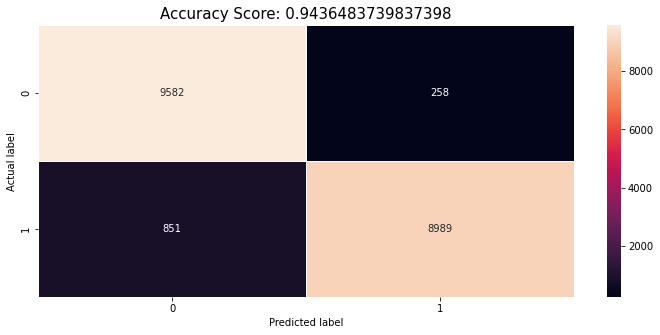

In [2]:
#Read the dataset and apply SMOTE for class imbalanace

df = pd.read_csv('Data\creditcard.csv')
df.drop(columns=['Time', 'Amount'], inplace=True)

# Oversampling the inferior class with more than 10% 
# of the superior class size. With enough random sample
#size we are guaranteed that we keep as good an approximation
# as of the original distribution.

c = df[df.Class==0].sample(100*(df.Class==1).sum())
f = df[df.Class==1]
final_df = shuffle(pd.concat([c,f], ignore_index=True))
data = final_df.iloc[:,:-1]
labels = final_df.iloc[:,-1]
oversample = SMOTE()
data, labels = oversample.fit_resample(data, labels)

X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=4)
print(f'Number of samples for class 0 : {(Y_train==0).sum()} \nNumber of samples for class 1: {(Y_train==1).sum()}'\
      f'\nAs we can see the sizes are almost identical.')

#Training of the labeled data and testing results

label_model = LogisticRegression(random_state=4).fit(X_train, Y_train)
preds1 = label_model.predict(X_test)
score1 = metrics.accuracy_score(Y_test, preds1)
cm1 = metrics.confusion_matrix(Y_test, preds1)
plt.figure(figsize=(12, 5))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=.5);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score1}'
plt.title(all_sample_title, size = 15);

Most of distribution of each feature are almost identical if you check them. Few of them have some differences.


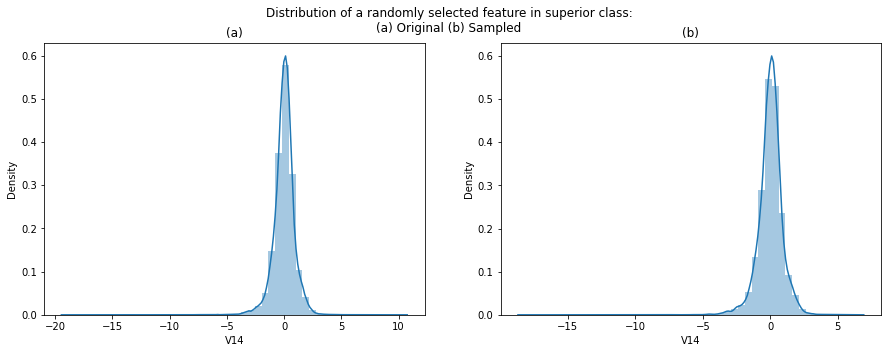

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of a randomly selected feature in superior class:\n(a) Original (b) Sampled')
sns.distplot(df.V14, ax=axes[0]).set_title('(a)') 
sns.distplot(c.V14, ax=axes[1]).set_title('(b)') 
print(f'Most of distribution of each feature are almost identical if you check them. Few of them have some differences.')

In [3]:
#################################################################################################
# Split train dataset into labeled and unlabeled
#################################################################################################

X_train_lab, X_train_unlab, Y_train_lab, Y_train_unlab= train_test_split(X_train.to_numpy(),
                                                                         Y_train.to_numpy(),
                                                                         test_size=0.7, 
                                                                         random_state=4,
                                                                         stratify=Y_train.to_numpy())

# create "no label" for unlabeled data (-1==unlabeled)

unlabeled = np.ones(len(Y_train_unlab))*(-1)

# recombine training dataset labels

mixed_data = np.concatenate((X_train_lab, X_train_unlab))
mixed_labels = np.concatenate((Y_train_lab, unlabeled))

# define and train model

unlabeled_model = LabelPropagation('knn')
unlabeled_model.fit(mixed_data, mixed_labels)


LabelPropagation(kernel='knn')

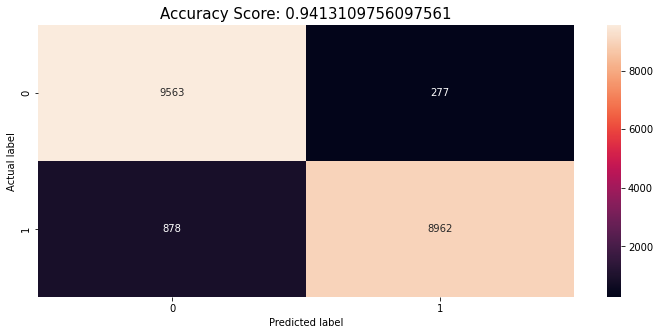

In [4]:
# Take the predicted labels and train on them
# the logistic regression model and test on the 
# original test sample

given_labels = unlabeled_model.transduction_
label_model = LogisticRegression(random_state=4)
label_model.fit(mixed_data, given_labels)
preds2 = label_model.predict(X_test.to_numpy())
score2 = metrics.accuracy_score(Y_test.to_numpy(), preds2)
cm3 = metrics.confusion_matrix(Y_test.to_numpy(), preds2)
plt.figure(figsize=(12,5))
sns.heatmap(cm3, annot=True, fmt=".0f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score2}'
plt.title(all_sample_title, size = 15);